# 최 하단부 plt에 한국어 표시하기 위한 부분

In [ ]:
# 단계 1: 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,313 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 폰트 적용
plt.rc('font', family='NanumBarunGothic') 

# 마운트, 기본 피쳐 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# mecab_noun의 클러스터링

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# 전처리 되어 있으므로 이미 되어 있는 파일 바로 부를 것

In [ ]:
# df_merge_2211292300.csv 파일을 읽어온다.

df_merge = pd.read_csv('/content/drive/MyDrive/Code/현국/df_merge_2211292300.csv', encoding='utf-8', index_col=0)
df_merge.tail()

,keyword,isinTrue,noun
422,오륙도,무서우다 가파르다 아름답다 고프다 싱겁다 멋지다 인상깊다 수많다 놀랍다 이렇다 귀...,광장 작품 예매 하늘 전망대 바다 입구 강 예약 포즈 운영 영상 수육 박물관 소주 ...
423,이기대,가파르다 아름답다 고프다 싱겁다 멋지다 얼큰하다 커다랗다 수많다 놀랍다 이렇다 귀...,광장 작품 하늘 그릇 전망대 바다 입구 그림 강 등대 아기 예약 다양 운영 영상 수...
424,장산,가파르다 아름답다 고프다 친하다 싱겁다 멋지다 수많다 습하다 귀찮다 기쁘다 가볍다...,광장 작품 예매 전망대 사찰 바다 입구 등대 예약 다양 포즈 운영 영상 수육 감성 ...
425,태종대,가파르다 아름답다 고프다 멋지다 커다랗다 놀랍다 이렇다 귀찮다 뿌옇다 가볍다 밝다...,광장 예매 하늘 전망대 사찰 바다 입구 등대 예약 다양 포즈 운영 영상 수육 감성 ...
426,학리방파제,자리다 과중되다 아름답다 멋지다 얼큰하다 인상깊다 따숩다 이렇다 귀찮다 가볍다 세...,예매 바다 입구 그림 강 등대 예약 다양 운영 영상 감성 소주 추억 기념 향 화장실...


In [6]:
# isinTrue 컬럼과 noun 컬럼 합침

df_merge['noun'] = df_merge['noun'].astype(str)
df_merge['isinTrue'] = df_merge['isinTrue'].astype(str)
df_merge['merge'] = df_merge['noun'] + df_merge['isinTrue']

df_merge.tail()

,keyword,isinTrue,noun,merge
422,오륙도,무서우다 가파르다 아름답다 고프다 싱겁다 멋지다 인상깊다 수많다 놀랍다 이렇다 귀...,광장 작품 예매 하늘 전망대 바다 입구 강 예약 포즈 운영 영상 수육 박물관 소주 ...,광장 작품 예매 하늘 전망대 바다 입구 강 예약 포즈 운영 영상 수육 박물관 소주 ...
423,이기대,가파르다 아름답다 고프다 싱겁다 멋지다 얼큰하다 커다랗다 수많다 놀랍다 이렇다 귀...,광장 작품 하늘 그릇 전망대 바다 입구 그림 강 등대 아기 예약 다양 운영 영상 수...,광장 작품 하늘 그릇 전망대 바다 입구 그림 강 등대 아기 예약 다양 운영 영상 수...
424,장산,가파르다 아름답다 고프다 친하다 싱겁다 멋지다 수많다 습하다 귀찮다 기쁘다 가볍다...,광장 작품 예매 전망대 사찰 바다 입구 등대 예약 다양 포즈 운영 영상 수육 감성 ...,광장 작품 예매 전망대 사찰 바다 입구 등대 예약 다양 포즈 운영 영상 수육 감성 ...
425,태종대,가파르다 아름답다 고프다 멋지다 커다랗다 놀랍다 이렇다 귀찮다 뿌옇다 가볍다 밝다...,광장 예매 하늘 전망대 사찰 바다 입구 등대 예약 다양 포즈 운영 영상 수육 감성 ...,광장 예매 하늘 전망대 사찰 바다 입구 등대 예약 다양 포즈 운영 영상 수육 감성 ...
426,학리방파제,자리다 과중되다 아름답다 멋지다 얼큰하다 인상깊다 따숩다 이렇다 귀찮다 가볍다 세...,예매 바다 입구 그림 강 등대 예약 다양 운영 영상 감성 소주 추억 기념 향 화장실...,예매 바다 입구 그림 강 등대 예약 다양 운영 영상 감성 소주 추억 기념 향 화장실...


# 전처리 시작

In [ ]:
# 데이터 불러오기

# mecab_noun = pd.read_csv('/content/drive/MyDrive/최종프로젝트/data/noun_intersection.csv', encoding='utf-8',index_col=0)
mecab_noun = pd.read_csv('/content/drive/MyDrive/Data/noun_intersection.csv', encoding='utf-8',index_col=0)

mecab_noun.head()

In [ ]:
# intersection 컬럼을 noun로 변경하고 덮어쓰기

mecab_noun = mecab_noun.rename(columns={'intersection':'noun'})
mecab_noun.head()

In [ ]:
mecab_noun['noun'] = mecab_noun['noun'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
mecab_noun.head()

# 형용사 불러오기

In [ ]:
# 데이터 불러오기

df_mecab_adj = pd.read_csv('/content/drive/MyDrive/Code/소희/adj_clustering_csv/adj_total_100_2.csv', encoding='utf-8')

df_mecab_adj.head()


In [ ]:
df_mecab_adj['isinTrue'] = df_mecab_adj['isinTrue'].apply(lambda x: set(x.split())) # 행 중복 단어 제거

In [ ]:
df_mecab_adj['isinTrue']=df_mecab_adj['isinTrue'].apply(lambda x: str(x).replace('{', '[').replace('}', ']'))
df_mecab_adj['isinTrue'] = df_mecab_adj['isinTrue'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

In [ ]:
# df_mecab_adj와 mecab_noun을 merge

df_merge = pd.merge(df_mecab_adj, mecab_noun, on='keyword', how='left')

df_merge.head()

In [ ]:
# isinTrue가 NaN인 행 제거

df_merge = df_merge.dropna(subset=['isinTrue'])

df_merge.tail()

In [ ]:
# df_merge csv로 저장

df_merge.to_csv('/content/drive/MyDrive/Code/현국/df_merge_2211292300.csv', encoding='utf-8-sig')

# 벡터화 준비

In [7]:
# konlpy 설치

!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.3 MB/s 
     |████████████████████████████████| 465 kB 56.5 MB/s 


In [8]:
from konlpy.tag import Okt
okt = Okt()

# 벡터화 여러 방법 시도

# 그냥 실행하지 말 것. 무슨 조합인지 보고 실행 할 것

같이 돌리기, 따로 돌리기, 곱하기 등등...

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'], df_merge['isinTrue'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'], df_merge['isinTrue'])

tfidf_matrix.shape

# 클러스터링

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

# test

In [9]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['merge'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['merge'])

tfidf_matrix.shape

(427, 1518)

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'] + df_merge['isinTrue'])

# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'] + df_merge['isinTrue'])

# tfidf_matrix.shape

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn import datasets
# from sklearn.cluster import KMeans

# iris = datasets.load_iris()
# samples = iris.data
# # 3개의 그룹으로 나누는 K-Means 모델을 생성합니다
# model = KMeans(n_clusters = 3)
# model.fit(samples)
# labels = model.predict(samples)
# # 클러스터링 결과를 시각화합니다
# x = samples[:, 0]
# y = samples[:, 1]
# plt.scatter(x, y, c=labels, alpha=0.5)
# plt.xlabel('sepal length (cm)')
# plt.ylabel('sepal width (cm)')
# plt.show()

In [10]:
# 위 코드를 사용하여 tfidf_matrix K-Means 모델 생성

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3)
model.fit(tfidf_matrix)
labels = model.predict(tfidf_matrix)

labels

array([1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2,
       0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 2,
       0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0,

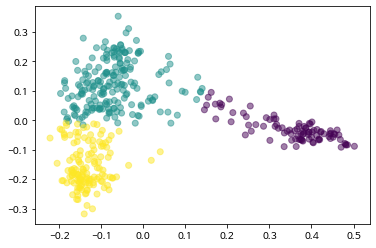

In [11]:
# (0,1) 사이에 나오게 하기 위해 PCA 사용

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)

plt.show()

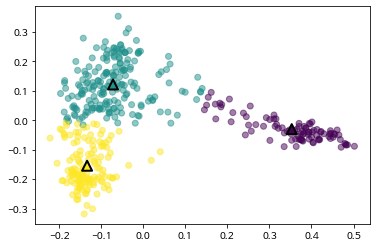

In [12]:
# cluster == 0 의 중심점을 표시

import numpy as np

cluster_centers = model.cluster_centers_
cluster_centers = np.array(cluster_centers)
cluster_centers = pca.transform(cluster_centers)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='^', c=[0, 1, 2], s=100, linewidth=2, edgecolor='k')
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)

for i in range(len(pca_data[:, 0])):
    plt.text(pca_data[i, 0], pca_data[i, 1], df_merge['keyword'][i] + ' ' + str(labels[i]))

cluster_centers = model.cluster_centers_
cluster_centers = np.array(cluster_centers)
cluster_centers = pca.transform(cluster_centers)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='^', c=[0, 1, 2], s=400, linewidth=2, edgecolor='k')

# plt.show()

plt.savefig('savefig_big.png')

# 2 tfidf_vectorizer.fit_transform(df_merge['noun'] + df_merge['isinTrue'])

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'] + df_merge['isinTrue'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'] + df_merge['isinTrue'])

tfidf_matrix.shape

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

# 중심점 정리

In [ ]:
# 각 클러스터의 중심점을 구함

centroids = kmeans.cluster_centers_
centroids

In [ ]:
# 각 클러스터의 중심점을 표시

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', alpha=0.5)

plt.show()

In [ ]:
# 0번 클러스터의 중심점을 구함

center_0 = kmeans.cluster_centers_[0]

In [ ]:
# 0번 클러스터의 중심점을 시각화

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.scatter(center_0[0], center_0[1], s=100, c='green', alpha=0.5)

plt.show()

# 각 포인트와 가장 가까운 centroid의 거리를 구함

# 뻘짓

In [ ]:
# 각 포인트와 가장 가까운 중심점의 거리를 구함

import numpy as np
from scipy.spatial import distance

# 포인트와 centroid의 거리 계산

distances = distance.cdist(tfidf_matrix.toarray(), centroids, 'euclidean')

In [ ]:
# distances 표시

distances

In [ ]:
distances[0]

In [ ]:
distances[1]

In [ ]:
distances[2]

In [ ]:
distances[300]

In [ ]:
# 0번 클러스터와 0번 클러스터 중심점의 거리 구하기

distances[0][0]

In [ ]:
# diameter를 구함

diameter = np.max(distances[0][0])
diameter

In [ ]:
# 0번 클러스터와 1번 클러스터 중심점의 거리 구하기

distances[0][1]

In [ ]:
# 0번 클러스터와 2번 클러스터 중심점의 거리 구하기

distances[0][2]

In [ ]:
# 0번 클러스터에 속하는 포인트의 갯수

np.sum(kmeans.labels_ == 0)

# 분해 조립

In [ ]:
pca = PCA(n_components=2)

In [ ]:
data = pca.fit_transform(kmeans)
data.shape

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp

In [ ]:
kmeans.fit(tfidf_matrix)

In [ ]:
# 각 클러스터의 중심점 구하기

centroids = kmeans.cluster_centers_
centroids

In [ ]:
# kmeans.labes_ == 0인 것들 만 분류하고 그 tfidf_matrix를 구함

c_0 = tfidf_matrix[kmeans.labels_ == 0]

In [ ]:
# c_0의 중심점을 구함

c_0_centroid = np.mean(c_0.toarray(), axis=0)
c_0_centroid

In [ ]:
# c_0 과 c_0_centroid 시각화

pca = PCA(n_components=2)

pca.fit(c_0.toarray())

pca_data = pca.transform(c_0.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', alpha=0.5)

plt.scatter(c_0_centroid[0], c_0_centroid[1], s=100, c='green', alpha=0.5)

plt.show()

In [ ]:
# kmeans.labes_ == 1인 것들 만 분류하고 그 tfidf_matrix를 구함

c_1 = tfidf_matrix[kmeans.labels_ == 1]

c_1_centroid = np.mean(c_1.toarray(), axis=0)
c_1_centroid

# c_0 과 c_0_centroid 시각화

pca = PCA(n_components=2)

pca.fit(c_1.toarray())

pca_data = pca.transform(c_1.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', alpha=0.5)

plt.scatter(c_1_centroid[0], c_1_centroid[1], s=100, c='green', alpha=0.5)

plt.show()

In [ ]:
# kmeans.labes_ == 2인 것들 만 분류하고 그 tfidf_matrix를 구함

c_2 = tfidf_matrix[kmeans.labels_ == 2]

c_2_centroid = np.mean(c_2.toarray(), axis=0)
c_2_centroid

# c_0 과 c_0_centroid 시각화

pca = PCA(n_components=2)

pca.fit(c_2.toarray())

pca_data = pca.transform(c_2.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', alpha=0.5)

plt.scatter(c_2_centroid[0], c_2_centroid[1], s=100, c='green', alpha=0.5)

plt.show()

In [ ]:
cluster = kmeans.predict(tfidf_matrix)
cluster

In [ ]:
center = kmeans.cluster_centers_
center

In [ ]:
# c_0, c_1, c_2를 함께 표시 하고 c_0_centroid, c_1_centroid, c_2_centroid를 함께 시각화

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.scatter(center[:, 0], center[:,1], c=kmeans.cluster_centers_, alpha=0.5)

# plt.scatter(c_0_centroid[0], c_0_centroid[1], s=100, c='green', alpha=0.5)

# plt.scatter(c_1_centroid[0], c_1_centroid[1], s=100, c='green', alpha=0.5)

# plt.scatter(c_2_centroid[0], c_2_centroid[1], s=100, c='green', alpha=0.5)

plt.show()

# k-medroids, 개판임

In [ ]:
! pip install scikit-learn-extra

In [ ]:
# k-medoids 알고리즘을 이용한 클러스터링

from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=9, max_iter=30,random_state=42).fit(tfidf_matrix)

kmedoids.labels_

In [ ]:
# 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmedoids.labels_, alpha=0.5)

plt.show()

# 2-1

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['isinTrue'] - df_merge['noun'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['isinTrue'] - df_merge['noun'])

tfidf_matrix.shape

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

# 3 tfidf_vectorizer.fit_transform(df_merge['noun'], df_merge['isinTrue'])

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['noun'], df_merge['isinTrue'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge['isinTrue'],df_merge['noun'])

tfidf_matrix.shape

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

4

In [ ]:
# df_merge1 생성

df_merge1 = df_merge.copy()


In [ ]:
# df_merge1의 'isinTrue' 와 'noun'을 합침

df_merge1['plus'] = df_merge1['isinTrue'] + df_merge1['noun']
df_merge1.head()

In [ ]:
# 벡터화
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge1['plus'])

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_merge1['plus'])

tfidf_matrix.shape

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=3, init='random', n_init=30, max_iter=30, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

# 이하는 실패한 내용

In [ ]:
# 벡터화
# tfidf_vectorizer.fit_transform(df_merge['noun'])와 tfidf_vectorizer.fit_transform(df_merge['isinTrue'])의 곱으로 표현

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# tfidf_matrix_1 = tfidf_vectorizer.fit_transform(df_merge['noun'])
# tfidf_matrix_2 = tfidf_vectorizer.fit_transform(df_merge['isinTrue'])



tfidf_matrix_1 = tfidf_vectorizer.fit_transform(df_merge['noun']).toarray()
tfidf_matrix_2 = tfidf_vectorizer.fit_transform(df_merge1['isinTrue']).toarray()

In [ ]:
# tfidf_matrix_1.shape가 tfidf_matrix_2 와 다르다면 tfidf_matrix_1 크기를 tfidf_matrix_2 크기로 맞춰준다.

tfidf_matrix_1.shape

tfidf_matrix_2.shape

tfidf_matrix_1 = tfidf_matrix_1[:tfidf_matrix_2.shape[0], :tfidf_matrix_2.shape[1]]

tfidf_matrix_1.shape

In [ ]:
# tfidf_matrix_1.shape를 (427,1063)로 확장

tfidf_matrix_1.resize((427,1063))

tfidf_matrix_1.shape

In [ ]:
# tfidf_matrix_1.shape가 tfidf_matrix_2 와 다르다면 tfidf_matrix_1 크기를 tfidf_matrix_2 크기로 맞추되 빈 공간에 0을 넣어준다.

import numpy as np

tfidf_matrix_1 = np.concatenate((tfidf_matrix_1, np.zeros((tfidf_matrix_2.shape[0] - tfidf_matrix_1.shape[0], tfidf_matrix_1.shape[1]))), axis=0)

tfidf_matrix_1.shape


In [ ]:

# tfidf_matrix_1 = tfidf_matrix_1.reshape(tfidf_matrix_1.shape[0], tfidf_matrix_1.shape[1], 1)
# tfidf_matrix_2 = tfidf_matrix_2.reshape(tfidf_matrix_2.shape[0], tfidf_matrix_2.shape[1], 1)

tfidf_matrix = tfidf_matrix_1 + tfidf_matrix_2

tfidf_matrix.shape